## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different produc

https://www.youtube.com/watch?v=fHFOANOHwh8&t=153sts.

In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
pd.set_option("display.max_columns", 500)

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
data.shape

(550068, 12)

In [5]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
data_test = pd.read_csv("test.csv")

In [16]:
data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [21]:
data_final =  pd.concat([data, data_test], ignore_index=True)

In [22]:
data_final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [24]:
data_final.shape

(783667, 12)

In [25]:
data.shape

(550068, 12)

In [26]:
data_final.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
783666,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [29]:
data_final.drop(["User_ID"], axis= True, inplace=True)

In [30]:
data_final

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


## Data Preparation

In [31]:
data_final["Marital_Status"].value_counts()

Marital_Status
0    462538
1    321129
Name: count, dtype: int64

In [40]:
# Handling Categorical Feature Gender
data_final["Gender"] = data_final["Gender"].map({"F":0, "M":1})

In [42]:
data_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [45]:
# handling Categorical Feature Age

data_final["Age"].value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [46]:
data_final["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
data_final = data_final

In [47]:
data_final["Age"] = data_final["Age"].map({"0-17":1, "18-25":2, "26-35":3, "36-45":4, "46-50":5, "51-55":6, "55+":7})

In [49]:
data_final["Age"].value_counts()

Age
3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: count, dtype: int64

In [51]:
data_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [52]:
data_final["City_Category"].value_counts()

City_Category
B    329739
C    243684
A    210244
Name: count, dtype: int64

In [60]:
# fixing categorical variable City_Category
data_city=pd.get_dummies(data_final["City_Category"], drop_first=True, dtype=int)

In [61]:
data_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [62]:
data = pd.concat([data_final, data_city], axis =1)

In [63]:
data.shape

(783667, 13)

In [64]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [65]:
# drop city category
data.drop("City_Category", axis = 1)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [66]:
data.isnull().sum()


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [68]:
data["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [69]:
data["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [70]:
data["Product_Category_3"].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [71]:
 data["Product_Category_2"] = data["Product_Category_2"].fillna(data["Product_Category_2"].mode()[0])

In [75]:
data["Product_Category_2"].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [76]:
 data["Product_Category_3"] = data["Product_Category_3"].fillna(data["Product_Category_3"].mode()[0])

In [77]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [78]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [79]:
data["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: count, dtype: int64

In [81]:
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].str.replace('+', '')

In [82]:
data["Stay_In_Current_City_Years"]

0         2
1         2
2         2
3         2
4         4
         ..
783662    4
783663    4
783664    4
783665    4
783666    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [83]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


In [84]:
# Convert object to int

data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].astype(int)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

## Visualization

In [88]:
data.drop(["City_Category"], inplace=True)

KeyError: "['City_Category'] not found in axis"

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

In [91]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


([<matplotlib.patches.Wedge at 0x23b8e73de10>,
 [Text(-0.30762903603285247, 1.0561081271297452, '0'),
  Text(0.30762913491282995, -1.0561080983274316, '1')])

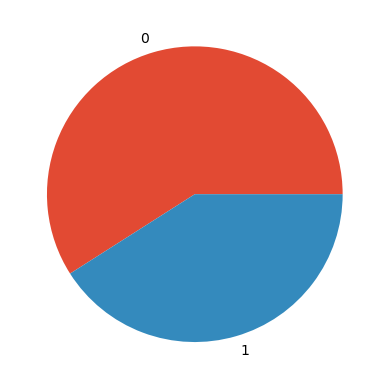

In [32]:
plt.pie(x= data_final["Marital_Status"].value_counts().values, labels=data_final["Marital_Status"].value_counts().index)

C:\Users\Aundrila Acharjee\AppData\Local\Temp\ipykernel_14896\3360669299.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_final["Marital_Status"].value_counts().index, y=data_final["Marital_Status"].value_counts().values, palette="viridis")


<Axes: xlabel='Marital_Status'>

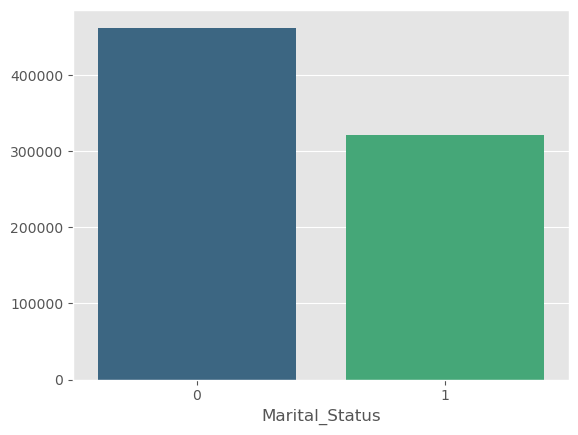

In [39]:
sns.barplot(x=data_final["Marital_Status"].value_counts().index, y=data_final["Marital_Status"].value_counts().values, palette="viridis")

<Axes: xlabel='Age', ylabel='Purchase'>

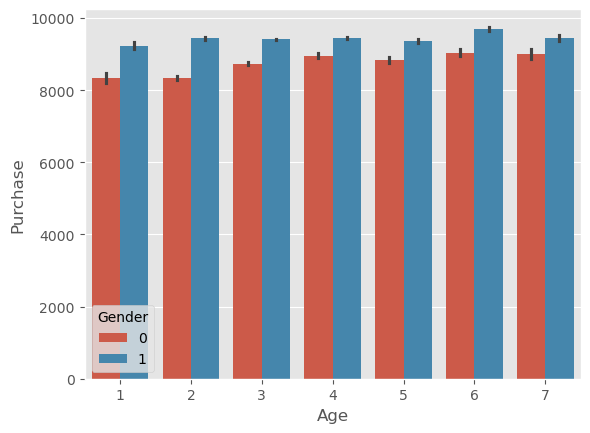

In [95]:
sns.barplot(x="Age", y="Purchase", hue="Gender",data=data)

Male purchases more goods than Female.

<Axes: xlabel='Occupation', ylabel='Purchase'>

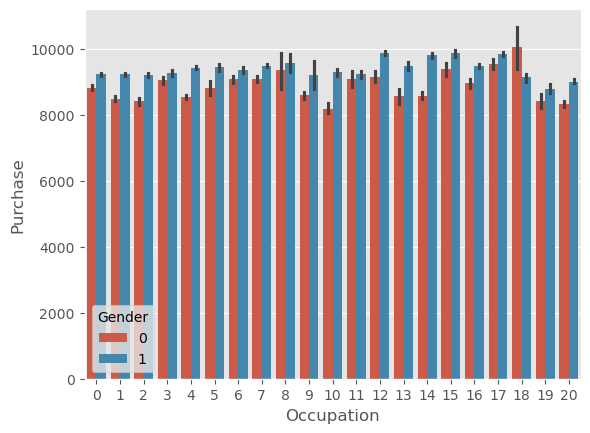

In [97]:
sns.barplot(x="Occupation", y="Purchase", hue="Gender",data=data)

In [99]:
data["Occupation"].value_counts()

Occupation
4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: count, dtype: int64

In [100]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0,0,1


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

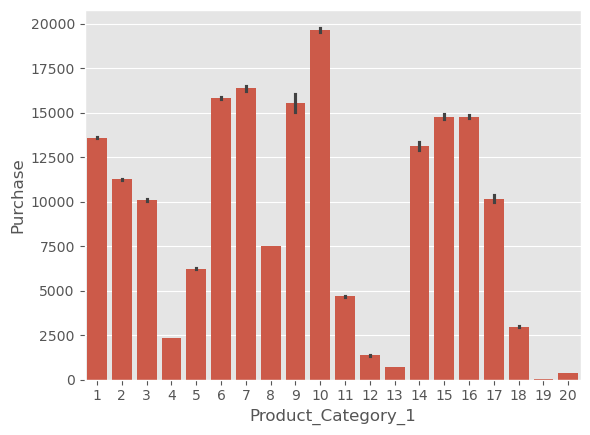

In [101]:
sns.barplot(x="Product_Category_1", y="Purchase",data=data)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

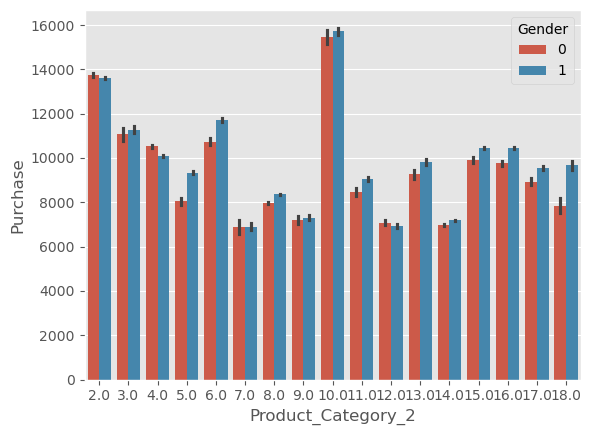

In [102]:
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender",data=data)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

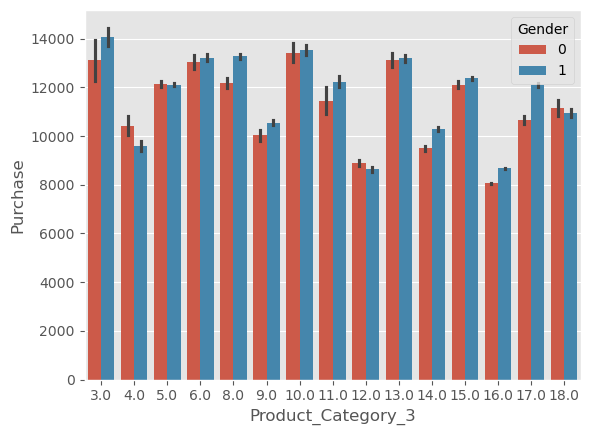

In [103]:
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender",data=data)

## Feature Scaling